<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793654/blob/main/Actividad5(IBM_Mod_2_DA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
## Actividad 5
## Cursos de IBM
### Data Analysis With Python
### Modulo 2
#### Profesor: Jobish Vallikavungal Devassia
#### Profesor Tutor: Roberto Antonio Guevara González
#### Bernardo Mijangos Flores
####Matricula A01793654

# Laboratorio 2

## Objetivos:

#### Manejar valores faltantes
#### Formato de datos correcto
#### Estandarizar y normalizar datos

Data wrangling es el proceso de convertir datos del formato inicial a un formato que puede ser mejor para el análisis.

In [1]:
import pandas as pd
import matplotlib.pylab as plt

Descargamos el dataframe autos.csv de la URL "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

posteriormente los cargamos a la carpeta de google colab para poder utilizarlo

In [2]:
filename = "auto.csv"

In [3]:
# lista que contiene el nombre de los encabezados.

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
# uso del método read_csv() de Pandas para cargar los datos
# Se establece el parámetro "names" igual a los "headers" de la lista previa.

df = pd.read_csv(filename, names = headers)

In [ ]:
# mostramos la informacion
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


se puede observar que existen varios signos de interrogación en el dataset, esos son valores faltantes pueden dificultar nuestro análisis posterior.

¿Cómo trabajar con los datos faltantes?

Pasos:
* Identificar datos faltantes
* Tratar con datos faltantes
* Formato de datos correcto


# Identificar los datos faltantes

# Convertir "?" a NaN

En el dataset del automóvil, los datos faltantes vienen con el signo de interrogación "?". Reemplazamos "?" con NaN (No es un número).

usamos la función .reemplazar(A, B, inplace = True) para reemplazar A por B.

In [6]:
import numpy as np

# reemplazamos "?" por NaN

df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450



Evaluación de datos faltantes

Se usa las siguientes funciones para identificar valores faltantes.

Existen dos métodos para detectar datos faltantes:

* .isnull()
* .notnull()

La salida es un valor booleano que indica si el valor que se pasa al argumento es de hecho falta de datos.

In [7]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" significa que el valor es un valor perdido, mientras que "False" significa que el valor no es un valor perdido.

Usando un bucle for podemos calcular rápidamente la cantidad de valores que faltan en cada columna.  En el cuerpo del bucle for, el método ".value_counts()" cuenta el número de valores "True".

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

En el resumen se observa que cada columna tiene 205 filas de datos y siete de las columnas contienen datos faltantes:

* "normalized-losses": 41 datos perdidos
* "num-of-doors": 2 datos perdidos
* "bore": 4 datos perdidos
* "stroke" : 4 datos perdidos
* "horsepower": 2 datos perdidos
* "peak-rpm": 2 datos perdidos
* "price": 4 datos perdidos

¿Cómo lidiar con los datos faltantes?

* Drop data
 * Elimina la fila
 * Elimina la columna
* Replace data
 * Reemplaza por media
 * Reemplaza por la frecuencia
 * Reemplaza basado en otras funciones

Las columnas completas deben eliminarse solo si la mayoría de las entradas de la columna están vacías.

Reemplazo por media:

* "normalized-losses": 41 datos perdidos
* "stroke": 4 datos perdidos
* "bore": 4 datos perdidos
* "horsepower": 2 datos perdidos
* "peak-rpm": 2 datos perdidos

Reemplazar por frecuencia:

* "num-of-doors": 2 datos faltantes, reemplazarlos con "cuatro"
  * Motivo: el 84% de los autos sedan son cuatro puertas. Dado que cuatro puertas es lo más frecuente, es más probable que ocurra

Eliminar toda la fila

* "precio": 4 datos faltantes, simplemente se elimina toda la fila
 * Motivo: el precio es lo que queremos predecir. Cualquier entrada de datos sin datos de precios no se puede utilizar para la predicción; por lo tanto, cualquier fila ahora sin datos de precios no es útil

In [9]:
# Calculo del valor medio de la columna "normalized-losses"

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [10]:
# Reemplazamos NaN con el valor medio de la columna "normalized-losses"

df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [11]:
# Calculo del valor medio para la columna "bore"

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [12]:
# Reemplazo de NaN con el valor medio de la columna "bore"

df["bore"].replace(np.nan, avg_bore, inplace=True)

## Pregunta 1:

Según el ejemplo anterior, reemplace NaN en la columna "stroke" con el valor medio.

In [13]:
# Calculo de la media para la columna "stroke"

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Media de la columna stroke:", avg_stroke)

Media de la columna stroke: 3.255422885572139


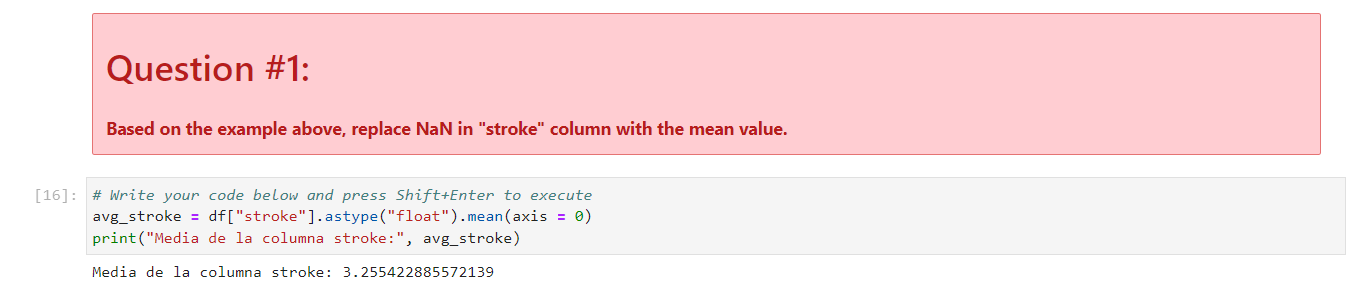

In [14]:
# Calculo del valor medio de la columan "horsepower"

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Media de la columna horsepower:", avg_horsepower)

Media de la columna horsepower: 104.25615763546799


In [15]:
# Reemplazo de NaN con el valor medio de la columna "horsepower"

df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [16]:
# Calculo del valor medio de la columna "peak-rpm"

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Media de la columna peak rpm:", avg_peakrpm)

Media de la columna peak rpm: 5125.369458128079


In [17]:
# Reemplazo de NaN con el valor medio de la columna "peak-rpm"

df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [18]:
# Se puede ver qué valores están presentes en una columna en particular

df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [19]:
# Se puede ver que cuatro puertas son el tipo más común.
# También podemos usar el método ".idxmax()" para calcular automáticamente el tipo más común:

df['num-of-doors'].value_counts().idxmax()

'four'

In [20]:
# reemplaza los valores faltantes de la columna "num-of-doors" por la frecuencia 

df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [21]:
# Elimina la fila con el valor NaN en la columna "price"
df.dropna(subset=["price"], axis=0, inplace=True)

# Reestablece el indice
df.reset_index(drop=True, inplace=True)

In [22]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Formato correcto

El último paso en la limpieza de datos es verificar y asegurarse de que todos los datos estén en el formato correcto (int, float, text u otro).

Con Pandas se usa:

.dtype() para comprobar el tipo de datos

.astype() para cambiar el tipo de datos

In [23]:
# Se usa una lista con los tipos de datos para cada columna.

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Como podemos ver arriba, algunas columnas no son del tipo de datos correcto. Las variables numéricas deben tener el tipo 'flotante' o 'int', y las variables con cadenas, como las categorías, deben tener el tipo 'objeto'.

Por ejemplo, las variables 'bore' y 'stroke' son valores numéricos que describen los motores, por lo que deberíamos esperar que sean del tipo 'float' o 'int'; sin embargo, se muestran como tipo 'objeto'.

Tenemos que convertir los tipos de datos a un formato adecuado para cada columna usando el método "astype()".

In [24]:
# Convierte el tipo de dato al formato adecuado

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [25]:
# Se actualiza la lista de las columnas después de la conversión.

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Estandarización de datos

Los datos generalmente se recopilan de diferentes agencias en diferentes formatos. (La estandarización de datos también es un término para un tipo particular de normalización de datos donde restamos la media y dividimos por la desviación estándar).

La estandarización es el proceso de transformar los datos en un formato común, lo que permite al investigador hacer una comparación significativa.

Ejemplo

Transformar mpg a L/100km:

En nuestro dataset, las columnas de consumo de combustible "city-mpg" y "highway-mpg" están representadas por unidades de mpg (millas por galón). Supongamos que estamos desarrollando una aplicación en un país que acepta el consumo de combustible con el estándar L/100km.

Tendremos que aplicar la transformación de datos para transformar mpg en L/100km.

In [26]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [27]:
# Convertimos mpg a L/100km con una operacion matematica (235 dividido por mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# Revisamos la transformacion de la data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


# Pregunta 2:
De acuerdo con el ejemplo anterior, transforme mpg a L/100km en la columna "highway-mpg" y cambie el nombre de la columna a "highway-L/100km".

In [28]:
# cambiamos mpg a L/100km con una operacion matematica (235 dividido por mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# cambiamos el nombre de la columna "highway-mpg" por "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# revisamos los cambios 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


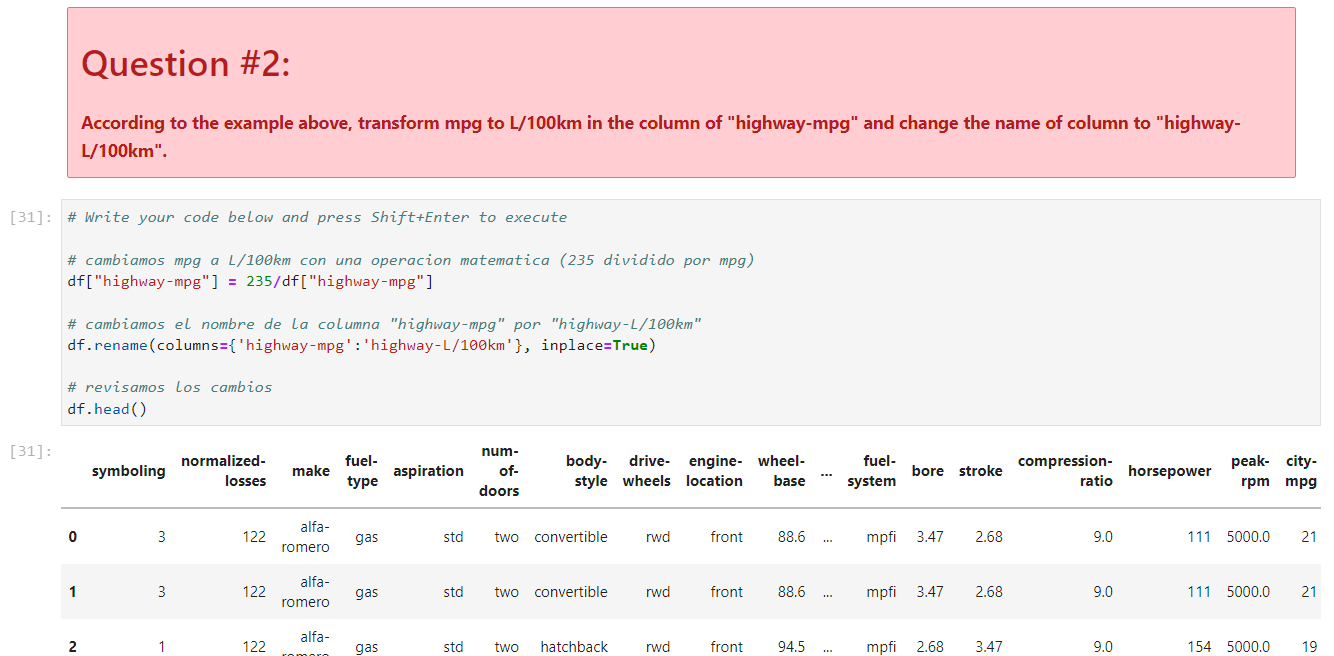

# Normalización de datos

La normalización es el proceso de transformar valores de varias variables en un rango similar. Las normalizaciones típicas incluyen escalar la variable para que el promedio de la variable sea 0, escalar la variable para que la varianza sea 1 o escalar la variable para que los valores de la variable oscilen entre 0 y 1.

Ejemplo

Para demostrar la normalización, digamos que queremos escalar las columnas "largo", "ancho" y "alto".

Objetivo: quisiera normalizar esas variables para que su valor oscile entre 0 y 1

Enfoque: reemplazar el valor original por (valor original)/(valor máximo)

In [29]:
# reemplaza (valor original) por (valor original)/(maximo valor)

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

# Pregunta 3:

De acuerdo con el ejemplo anterior, normalice la columna "height".

In [30]:
# reemplaza al igual que el codigo anterior
df['height'] = df['height']/df['height'].max() 

# mostramos las columnas escaladas
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


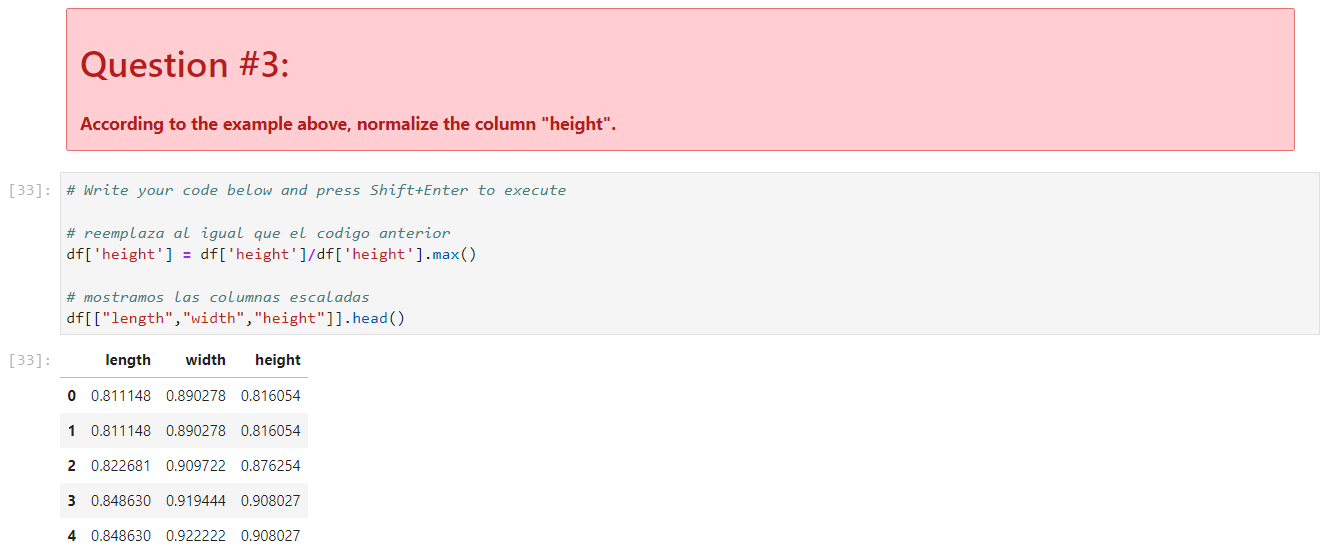

# Agrupación

La agrupacion es un proceso de transformación de variables numéricas continuas en 'bins' categóricos discretos para el análisis agrupado.

Ejemplo:

En nuestro conjunto de datos, "horsepower" es una variable de valor real que va de 48 a 288 y tiene 59 valores únicos. ¿Qué pasa si solo nos preocupamos por la diferencia de precio entre autos de alta potencia, potencia media y poca potencia (3 tipos)? ¿Podemos reorganizarlos en tres "contenedores" para simplificar el análisis?

Usaremos el método de pandas 'cut' para segmentar la columna 'horsepower' en 3 contenedores.

In [31]:
# ejemplo de agrupacion con pandas

df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

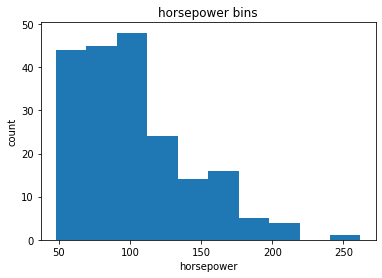

In [32]:
# Tracemos el histograma de horsepower para ver cómo se ve la distribución.

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Nos gustaría 3 contenedores de ancho de banda del mismo tamaño, por lo que usamos la función linspace (start_value, end_value, number_generated) de numpy.

Como queremos incluir el valor mínimo de horsepower, queremos establecer start_value = min(df["horsepower"]).

Como queremos incluir el valor máximo de horsepower, queremos establecer end_value = max(df["horsepower"]).

Dado que estamos construyendo 3 contenedores de igual longitud, debe haber 4 divisores, por lo que los numbers_generated = 4.

In [33]:
# Construimos una matriz bin con un valor mínimo a un valor máximo
# utilizando el ancho de banda calculado anteriormente.
# Los valores determinarán cuándo termina un contenedor y comienza otro.

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [34]:
# establecemos los nombres

group_names = ['Low', 'Medium', 'High']

In [35]:
# Aplicamos la función "cute" para determinar a qué pertenece cada valor de df['horsepower']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [36]:
# Veamos el número de vehículos en cada contenedor:

df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

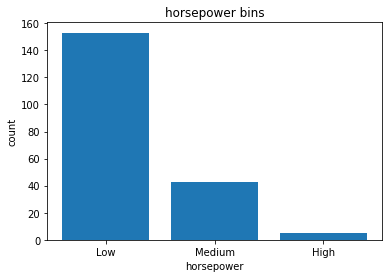

In [37]:
# trazamos la distribucion

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

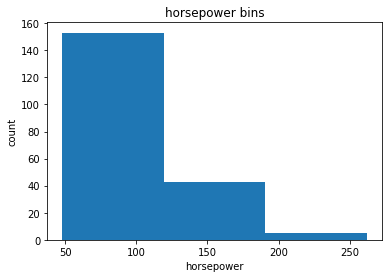

In [38]:
# Normalmente, se usa un histograma para visualizar la distribución de los contenedores que creamos anteriormente.

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

# Variable indicadora (o variable ficticia)

Una variable indicadora (o variable ficticia) es una variable numérica utilizada para etiquetar categorías. Se les llama 'dummies' porque los números en sí mismos no tienen un significado inherente.

Usamos variables indicadoras para poder usar variables categóricas para el análisis de regresión en los módulos posteriores.

Ejemplo:

Vemos que la columna "fuel-type" tiene dos valores únicos: "gas" o "diésel". La regresión no entiende de palabras, sólo de números. Para usar este atributo en el análisis de regresión, convertimos "fuel-type" en variables indicadoras.

Usaremos el método de pandas 'get_dummies' para asignar valores numéricos a diferentes categorías de tipo de combustible.

In [39]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [40]:
# se ogbtiene las variables del indicador y asigna el dataframe| "dummy_variable_1":

dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [41]:
# cambia los nombres de las columnas para mayor claridad:

dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [42]:
# en la columna 'fuel-type' tiene valores para 'gasolina' y 'diésel' como 0 y 1 ahora.

# cambia el data frame "df" y "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# elimina la columna original "fuel-type" de "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [43]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


# Pregunta #4:

Similar a lo anterior, cree una variable indicadora para la columna "aspiration"


In [44]:
# se obtiene la variable aspiration y se asigna al data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# cambia el nombre de las columnas
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# muestra las primeras 5 instancias del data frame "dummy_variable_2"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


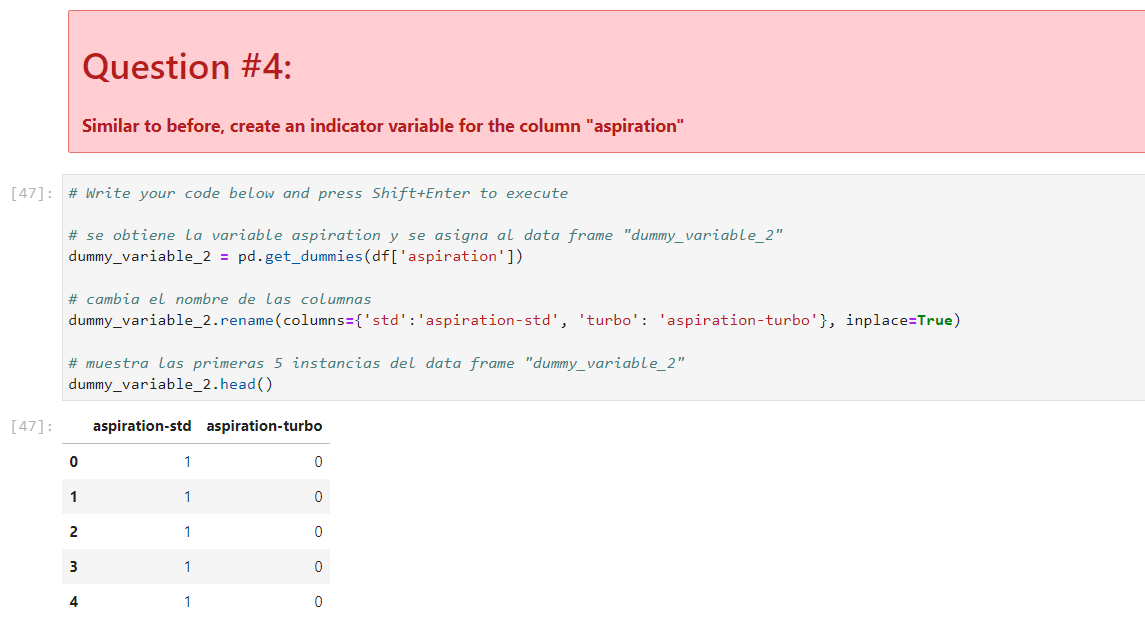

# Pregunta #5:

Combine el nuevo data frare con el data frame original, luego quite la columna 'aspiration'.

In [45]:
# conbina el nuevo dataframe con el original
df = pd.concat([df, dummy_variable_2], axis=1)

# quita la columna origital "aspiration" de "df"
df.drop('aspiration', axis = 1, inplace=True)

In [47]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


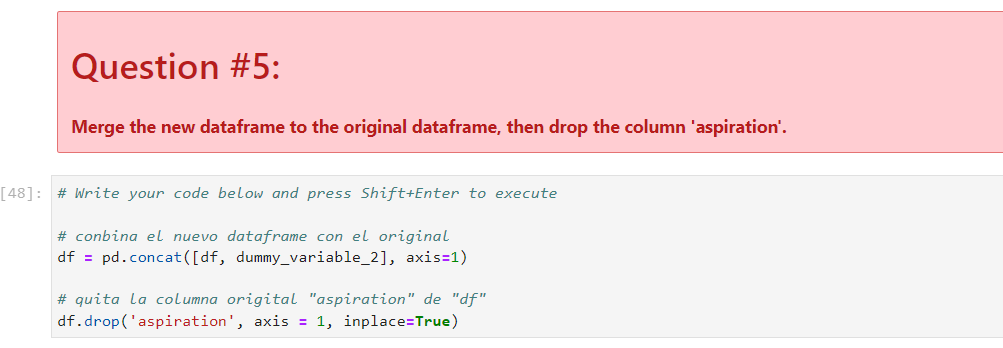

In [46]:
# guarda la informacion en el archivo csv

df.to_csv('clean_df.csv')